In [795]:
#Indepedend notebook from the Tweets acquisition.


In [1037]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob



#Modeling
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
import gensim
from nltk.stem import WordNetLemmatizer

from corextopic import corextopic as ct
from corextopic import vis_topic as vt





import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [69]:
df = pd.read_csv('rawtweets.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3872 non-null   int64  
 1   _type             3872 non-null   object 
 2   url               3872 non-null   object 
 3   date              3872 non-null   object 
 4   content           3872 non-null   object 
 5   renderedContent   3872 non-null   object 
 6   id                3872 non-null   int64  
 7   user              3872 non-null   object 
 8   replyCount        3872 non-null   int64  
 9   retweetCount      3872 non-null   int64  
 10  likeCount         3872 non-null   int64  
 11  quoteCount        3872 non-null   int64  
 12  conversationId    3872 non-null   int64  
 13  lang              3872 non-null   object 
 14  source            3872 non-null   object 
 15  sourceUrl         3872 non-null   object 
 16  sourceLabel       3872 non-null   object 


In [179]:
df.sample(5)

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean
1015,1015,snscrape.modules.twitter.Tweet,https://twitter.com/marissasaretsky/status/855...,2017-04-21 23:31:39+00:00,Thank you @Patagonia #wornwear for fixing my z...,Thank you @Patagonia #wornwear for fixing my z...,855564721545560065,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['wornwear', 'patagoniacasecomp']",NaN,thank you for fixing my zippers and ripped sea...
501,501,snscrape.modules.twitter.Tweet,https://twitter.com/leecentralcoast/status/119...,2019-11-25 17:24:24+00:00,Worn Wear was launched online in 2017 and has ...,Worn Wear was launched online in 2017 and has ...,1199015995224055809,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['patagonia', 'cre', 'retail', 'wornwear']",NaN,worn wear was launched online in 2017 and has ...
856,856,snscrape.modules.twitter.Tweet,https://twitter.com/fshn_evolution/status/9235...,2017-10-26 13:27:24+00:00,Patagonia's #WornWear Website Encourages a New...,Patagonia's #WornWear Website Encourages a New...,923541574667120640,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['WornWear', 'SustainableFashion']",NaN,patagonia's website encourages a new level of
1645,1645,snscrape.modules.twitter.Tweet,https://twitter.com/Canoeinc/status/7228359916...,2016-04-20 17:15:04+00:00,What’s the easiest way to reduce our impact on...,What’s the easiest way to reduce our impact on...,722835991602442240,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['WornWear'],NaN,what’s the easiest way to reduce our impact on...
3654,1154,snscrape.modules.twitter.Tweet,https://twitter.com/IMMtyler/status/4053727688...,2013-11-26 16:29:34+00:00,black friday antidote @patagonia #wornwear htt...,black friday antidote @patagonia #wornwear wor...,405372768834707456,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['wornwear'],NaN,black friday antidote
1147,1147,snscrape.modules.twitter.Tweet,https://twitter.com/OHIOzerowaste/status/84241...,2017-03-16 16:44:48+00:00,We can't wait to see the challenge course by @...,We can't wait to see the challenge course by @...,842416368603529217,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['recycle', 'wornwear', 'zerowaste']",NaN,we can't wait to see the challenge course by
2710,210,snscrape.modules.twitter.Tweet,https://twitter.com/MDickson76/status/57368365...,2015-03-06 03:16:57+00:00,Charged right up! Just got my old critical ma...,Charged right up! Just got my old critical ma...,573683659477221376,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['repair', 'memories', 'betterthannew', 'wornw...",NaN,charged right up! just got my old critical mas...
3837,1337,snscrape.modules.twitter.Tweet,https://twitter.com/PatagoniaTornto/status/316...,2013-03-25 21:59:33+00:00,#WornWear is seeking submissions! Consider sha...,#WornWear is seeking submissions! Consider sha...,316308396850679808,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['WornWear'],NaN,is seeking submissions! consider sharing your ...
3223,723,snscrape.modules.twitter.Tweet,https://twitter.com/ahpo5/status/4075602697545...,2013-12-02 17:21:55+00:00,Video: wornwear: Worn Wear – a Film About the ...,Video: wornwear: Worn Wear – a Film About the ...,407560269754535936,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,video: wornwear: worn wear – a film about the 

In [72]:
#Checking for duplicates. 

In [172]:
df.renderedContent.duplicated().sum()

74

In [173]:
df.drop_duplicates(subset ="renderedContent",
                     keep = 'last', inplace = True)

In [174]:
df.renderedContent.duplicated().sum()

0

In [175]:
df.nunique()

Unnamed: 0          2474
_type                  1
url                 3792
date                3784
content             3792
renderedContent     3792
id                  3792
user                2168
replyCount            13
retweetCount          49
likeCount            105
quoteCount            10
conversationId      3403
lang                  10
source                87
sourceUrl             81
sourceLabel           87
outlinks            1910
tcooutlinks         2318
media                985
retweetedTweet         0
quotedTweet          120
inReplyToTweetId     345
inReplyToUser        222
mentionedUsers       837
coordinates          195
place                132
hashtags            1142
cashtags               0
clean               3627
dtype: int64

In [176]:
#It looks like we have 2168 unique users in our 3792 tweets. #Location data is not significant enough,
#so it won't be taken into consideraton for analysis. 

In [161]:
# How many retweets do I have?
df.retweetedTweet.sum()

0.0

In [162]:
df.retweetedTweet.unique()

array([nan])

In [180]:
df.columns

Index(['Unnamed: 0', '_type', 'url', 'date', 'content', 'renderedContent',
       'id', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'clean'],
      dtype='object')

In [76]:
#A function to get rid of some undesired characters.
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [77]:
df['clean'] = df.content.apply(processTweet)

In [78]:
#Comparing the before and after of our initial data cleaning. 

In [79]:
#Function to count the most popular words in a pandas column
def wcounter(pdseries):
    all_words = []
    for line in list(pdseries):
        words = line.split()
        for word in words:
            all_words.append(word.lower())
    print (Counter(all_words).most_common(20))

In [80]:
wcounter(df.content)

[('#wornwear', 2802), ('the', 1938), ('@patagonia', 1796), ('to', 1326), ('a', 1022), ('and', 1007), ('for', 821), ('of', 758), ('on', 723), ('i', 640), ('in', 640), ('you', 610), ('is', 561), ('it', 495), ('at', 474), ('with', 446), ('this', 438), ('my', 420), ('@wornwear', 403), ('#patagonia', 386)]


In [81]:
wcounter(df.clean)

[('the', 1929), ('to', 1320), ('a', 1020), ('and', 994), ('for', 819), ('of', 757), ('on', 721), ('i', 639), ('in', 638), ('you', 609), ('is', 560), ('it', 495), ('at', 474), ('with', 445), ('this', 437), ('my', 420), ('your', 370), ('patagonia', 350), ('from', 341), ('wornwear', 335)]


In [82]:
#We see how now it became just pretty much stop-words 

In [113]:
#With this function, I'll add a column with the number of words in a tweet after cleaning. 
def word_count(sentence):
    return len(sentence.split())
    
df.wc = df.clean.apply(word_count)

In [83]:
#Goal for tonight will be to apply the NMF and see which are some of the words or punctuation signs that I need to get rid of.

# Seeing some random tweets: 

In [84]:
df.sample(3, random_state = 41)

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean
961,961,snscrape.modules.twitter.Tweet,https://twitter.com/ouliemata/status/879518863...,2017-06-27 01:56:52+00:00,This is AWESOME @patagonia Proud of my nicknam...,This is AWESOME @patagonia Proud of my nicknam...,879518863074906112,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['InStyle', 'wornwear']",NaN,"this is awesome proud of my nickname ""patch"" b..."
548,548,snscrape.modules.twitter.Tweet,https://twitter.com/gvanderloop/status/1177235...,2019-09-26 14:56:59+00:00,@patagonia saves the day with its repair! My c...,@patagonia saves the day with its repair! My c...,1177235623675125765,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['patagonia', 'repair', 'wornwear', 'berlin']",NaN,saves the day with its repair! my cell phone w...
1240,1240,snscrape.modules.twitter.Tweet,https://twitter.com/cunyGClibrary/status/83634...,2017-02-27 22:26:03+00:00,RT|@FIT As part of @Patagonia’s #WornWear coll...,RT|@FIT As part of @Patagonia’s #WornWear coll...,836341652881027072,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['WornWear'],NaN,"rt| as part of college tour, learn what to do ..."


In [56]:
df.content.sample(3, random_state=41)[961]

'This is AWESOME @patagonia Proud of my nickname "Patch" because of my refusal to replace my duct-taped outdoor clothing #InStyle #wornwear https://t.co/BvKDEjcXU5'

<img src="t1.png" style="width: 500px">

In [57]:
df.content.sample(3, random_state=41)[548]

'@patagonia saves the day with its repair! My cell phone was trapped behind a stuck zipper and you fixed it!  #patagonia #repair #wornwear #berlin https://t.co/JIXlEZd5Ur'

<img src="t2.png" style="width: 500px">

In [59]:
df.content.sample(3, random_state=41)[1240]

'RT|@FIT As part of @Patagonia’s #WornWear college tour, learn what to do and how to live on our threatened planet: https://t.co/D57RMEIkKV https://t.co/JdT3XZEtHW'

<img src="t3.png" style="width: 500px">

In [61]:
# Ok, let's go with the first iteration of the NMF to see what are the topics that come out. 

In [85]:
corpus = df.clean

In [95]:
words_to_add = ['wornwear', 'patagonia']

In [96]:
stop_w = ENGLISH_STOP_WORDS.union(words_to_add)

In [97]:
#Generating a TFIDF and then a NMF

In [98]:
tfidf = TfidfVectorizer(stop_words=stop_w)

tweet_word_matrix = tfidf.fit_transform(corpus)

vocab = tfidf.get_feature_names()

In [100]:
#Taking a look at vocab

In [1321]:
#vocab

In [104]:
#From here I notice that I need to get rid of numbers.  # re.sub(r'\w*\d\w*', '', words).strip()

In [1320]:
#tfidf.vocabulary_

In [106]:
#The vocabulary makes sense.

In [107]:
#Creating the first attempt to find topics. 

In [507]:
n_components = 6
nmf = NMF(n_components) #Creating the nmf object with 6 topics. 

nmf.fit(tweet_word_matrix)

NMF(n_components=6)

In [508]:
tweet_topic_matrix = nmf.transform(tweet_word_matrix) #Transforming the tweet_word_matrix
#and seeing the tweet_topic_matrix
pd.DataFrame(tweet_topic_matrix).head(3)

,0,1,2,3,4,5
0,0.00000,0.00000,0.00000,0.00000,0.10206,0.00000
1,0.00000,0.00515,0.00051,0.05606,0.00245,0.00642
2,0.00000,0.00312,0.00007,0.00958,0.00157,0.00877


In [509]:
#Now, we are gonna put together the topics and the original tweets to try to make sense of the topics.

# Tweet-Topic Matrix

In [510]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')

tweet_topic_matrix_df[['tweet_original', 'clean_tweets']] = df[['content', 'clean']]
tweet_topic_matrix_df.sample(5, random_state=42)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,tweet_original,clean_tweets
2323,0.00000,0.13198,0.00000,0.00000,0.00000,0.00000,"I just listed 'Patagonia torrentshell pants, H...","i just listed 'patagonia torrentshell pants, h..."
1419,0.00000,0.00000,0.00000,0.00000,0.13491,0.00000,@Patagonia #WornWear tour comes to the Whole E...,tour comes to the whole earth provision in tha...
2477,0.00000,0.00000,0.00000,0.00000,0.00248,0.00000,Tomorrow we are joining the @Patagonia #WornWe...,tomorrow we are joining the tour from 5-8 to s...
1583,0.00105,0.06230,0.00042,0.00302,0.00270,0.00141,The @patagonia #wornwear tour is at our @boxpa...,the tour is at our shop again today from 11. g...
952,0.00000,0.00015,0.00000,0.00437,0.00000,0.00000,#WornWear will be visiting Snow+Rock #PortSole...,will be visiting snow+rock on 15/16th july and...


# Word - Topic Matrix

In [511]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df.sample(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
felt,0.00000,0.00003,0.00002,0.00041,0.00012,0.00016
msu,0.00000,0.00000,0.00000,0.00254,0.00000,0.00000
items,0.00000,0.00775,0.00518,0.05112,0.01188,0.00901
experts,0.00000,0.00000,0.00000,0.00384,0.00133,0.00000
winter,0.00000,0.00304,0.00000,0.01997,0.01098,0.00416
yuri,0.00000,0.00003,0.00000,0.00012,0.00008,0.00010
internship,0.00000,0.00000,0.00000,0.00073,0.00000,0.00000
180,0.00145,0.00026,0.00000,0.00007,0.00000,0.00000
belhaven,0.00000,0.00000,0.00000,0.00101,0.00022,0.00375
mntn,0.00000,0.00000,0.00000,0.00029,0.00000,0.00415


# Now, let's procede with topic interpretation

In [512]:
## Seeing what tweets are present in topic 0, eventually we will see each of the topics by creating a function. 

In [513]:
def topics_tweets_words(topic, n_tweets, n_words):

    for tweet in tweet_topic_matrix_df.sort_values(by=topic, ascending=False).head(n_tweets)['tweet_original'].values:
        print(tweet ,'\n')
    print('____________________________________________________________________')
    print()
    print(f'Top {n_words} words in {topic}')
    print()
    print(word_topic_matrix_df.sort_values(by=topic, ascending=False).head(n_words))
    print('____________________________________________________________________')

In [514]:
topics_tweets_words('topic_0', n_tweets = 10, n_words= 10)

@DaHeathenOne76 Gald to hear it. Buy quality and use it for ever. #WornWear 

"The longer something lasts, the better"—Chasing waves and shaping boards in Tom Doidge-Harrison's #WornWear story: https://t.co/KBIlkte8cb 

nan 

Early morning hanging out in a pair of 18 year old patagonia Stand-Up Pants #wornwear whilst prep'ing… http://t.co/oWeNmSmqXq 

Video: wornwear: Worn Wear – a Film About the Stories We Wear Presented by Patagonia Directed by Keith,... http://t.co/7lOch8llwx 

Great #greenholidays recommendation: Celebrate what you already own. Check out #wornwear http://t.co/Nbvf9LILiF #betterthannew 

@patagonia your wear was available in Germany almost 20 years ago... #wornwear http://t.co/GTdPWLBXf8 

@patagonia my #WornWear Stretch Element has survived 12 Wasatch winters and counting. http://t.co/EVjjis47Dh 

Guess whose not waking up early tomorrow. This guy ✋
#AntiBlackFriday #WornWear #BetterThanNew 

MT @Phelps_agency: We're big fans of @patagonia's on-brand approach to #B

In [481]:
#So... This topic may be related to... stories? About time?

In [482]:
# Let's see topic 1.

In [483]:
topics_tweets_words('topic_1', 10, 10)

Coconut express @Patagonia wornwear #fabricinlay and resin tint ready for point panics. At… https://t.co/PYk3jkpyjj 

I just listed 'Marmot rain jacket, womens small, great con' on eBay. Check it out. #thrifting #wornwear #patagonia https://t.co/G518waGdQ2 

I just listed 'Prana Sweater. Womens Medium. Very soft and' on eBay. Check it out. #thrifting #wornwear #patagonia http://t.co/C9FUmmQqo8 

New box of @Patagonia wornwear upcycled fabric! Some new ones I've never seen before. This is going… https://t.co/n9ZXMZeVE6 

Hey #Seattle SAVE THE DATE @patagonia #wornwear Tour is stopping at Feathered Friends on Wed, 4/15 12-8pm http://t.co/jwh3eueuTO #patagonia 

Great day off yesterday with patagonianyc and wornwear. Great chatting with you Donnie and special… https://t.co/s8BI4U4G2W 

When giving this holiday season, give the thoughts of repair, care and #WornWear. Our free Worn Wear Repair and... https://t.co/1Bv3zE4Af0 

Repair is a Radical Act https://t.co/rpRmAedPu7 #patagonia #wornw

In [484]:
#Ok! This one is easy to identify, it's related to sells!

In [485]:
#Now, I'll create a function to get the rest of the topics.
def alltopics(topics ,n_tweets , n_words):
    for topic in topics:
        topics_tweets_words(topic, n_tweets, n_words)

In [486]:
#This time, we will start from topic_2, in the future, we will give the function all of the topics.

In [487]:
topics = ['topic_2', 'topic_3', 'topic_4', 'topic_5']

In [488]:
alltopics(topics,n_tweets=5, n_words = 5)

nan 

nan 

nan 

nan 

nan 

____________________________________________________________________

Top 5 words in topic_2

       topic_0  topic_1  topic_2  topic_3  topic_4  topic_5
eco    0.00000  0.00000  1.48929  0.00000  0.00000  0.00000
way    0.00424  0.00522  1.46495  0.04257  0.00101  0.00255
shop   0.00000  0.00000  1.46282  0.00000  0.00957  0.00286
finds  0.00000  0.00000  0.02210  0.00244  0.01063  0.01296
need   0.00000  0.01000  0.02005  0.16001  0.00854  0.04954
____________________________________________________________________
Just dropped my favourite jacket off to be fixed with #WornWear at @boxpark - they're there today and tomorrow #thisisthoughtful 

charmed the hiking boots off everyone on the @patagonia wornwear tour @bivouacannarbor --… https://t.co/msVQ9fquXV 

#wornwear tour back in #milano 

Tomorrow (3/1) on the quad bring clothes for repair to @patagonia #WornWear and check out @BeforeTheFlood_ at 7:30 pm in MGC Tavern! https://t.co/ELTsPjOGFv 

Checkin

In [489]:
#Now, for these other topics, it has gotten a little bit more fuzzy to identify topics. 

In [490]:
#Tomorrow's plan, use min_df, max_df and lemmatization or stemming. 

In [491]:
#Let's try with lemmatization first. 11-05-2021. 

In [1479]:
def streamline(n_components, n_tweets, n_words):
    #Creating a function to streamline the processes needed.
    #A function to get rid of some undesired characters.
    global df
    df = pd.read_csv('rawtweets.csv')
    
    df.drop_duplicates(subset ="renderedContent",
                         keep = 'last', inplace = True)

    df.drop(columns=['Unnamed: 0', '_type', 'content', 
                    'lang', 'conversationId','sourceUrl', 'source',
                    'sourceLabel', 'outlinks', 'tcooutlinks', 'inReplyToTweetId',
                    'inReplyToUser', 'cashtags'], inplace=True)
    df= df.rename(columns={'renderedContent': 'content'})
    
    #Deleting tweetst created by any of the patagonia accounts:
    df = df[~df.user.str.contains('patagonia')]
    
    def processTweet(tweet):
        # Remove HTML special entities (e.g. &amp;)
        tweet = re.sub(r'\&\w*;', '', tweet)
        #Convert @username to AT_USER
        tweet = re.sub('@[^\s]+','',tweet)
        # Remove tickers
        tweet = re.sub(r'\$\w*', '', tweet)
        # To lowercase
        tweet = tweet.lower()
        # Remove hyperlinks
        tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
        #Removing other hyperlinks that don't have http. 
        tweet = re.sub(r'\w+\.\w+\/.*', '', tweet)
        tweet = re.sub(r'\w+\.\w+\..*', '', tweet)
        # Remove hashtags
        tweet = re.sub(r'#\w*', '', tweet)
        # Remove whitespace (including new line characters)
        tweet = re.sub(r'\s\s+', ' ', tweet)
        # Remove single space remaining at the front of the tweet.
        tweet = tweet.lstrip(' ') 
        # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
        tweet = ''.join(c for c in tweet if c <= '\uFFFF')
        # Remove numbers
        tweet=  re.sub(r'\d', '', tweet)
        #Another one to try to remove links.
        tweet = re.sub(r'http\S+', '', tweet)
        
        return tweet
        
        #Tokenization and lemmanization. 
    def tokenize(tweet):
        """Returns tokenized representation of words in lemma form excluding stopwords"""
        result = []
        for token in gensim.utils.simple_preprocess(tweet):
            if token not in gensim.parsing.preprocessing.STOPWORDS \
                    and len(token) > 2:  # drops words with less than 3 characters
                result.append(lemmatize(token))
        return result


    def lemmatize(token):
        """Returns lemmatization of a token"""
        return WordNetLemmatizer().lemmatize(token, pos='v')
        
    def string_joiner(x):
        return ' '.join([str(item) for item in x])  
    
    df['clean'] = df.content.apply(processTweet)
    #Applying lemmatization
    df['lemma'] = df.clean.apply(tokenize)
    df['joined_lemma'] = df.lemma.apply(string_joiner)

    #Adding the column with the number of words after the cleaning. 
    def word_count(sentence):
        return len(sentence.split())
    df['wc'] = df.clean.apply(word_count)
    df['wcbc'] = df.content.apply(word_count)
    
    global corpus
    corpus = df.joined_lemma
    words_to_add = ['wornwear', 'patagonia', \
                    'rt', 'wear', 'instead', 'horse','stuff', 'wet', 'worn', 'today',
                   'tomorrow', 'come', 'smelly', 'flitbids', 'check', 'jacket']
    stop_w = ENGLISH_STOP_WORDS.union(words_to_add)
    global tfidf
    tfidf = TfidfVectorizer(stop_words=stop_w, max_df=0.6 ,max_features=1500, binary=False)
    global tweet_word_matrix
    tweet_word_matrix = tfidf.fit_transform(corpus)
    print(tweet_word_matrix.shape)
    global vocab
    vocab = tfidf.get_feature_names()
    global nmf
    nmf = NMF(n_components, random_state=44) #Creating the nmf object with n_components (or topics) 
    nmf.fit(tweet_word_matrix)
    global tweet_topic_matrix_df
    tweet_topic_matrix = nmf.transform(tweet_word_matrix)
    tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')
    global w
    w  = tweet_topic_matrix_df.columns.tolist()

    tweet_topic_matrix_df[['tweet_original', 'clean_tweets']] = df[['content', 'clean']]
    
    #Assigning each document to a topic by using the maximum likelihood from NMF
    df.reset_index(inplace=True)
    df['assigned_topic'] = tweet_topic_matrix_df.iloc[:,:n_components].idxmax(axis=1)
    
    global word_topic_matrix_df
    word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')

    alltopics(w, n_tweets, n_words)
    
    
# Trying CorEx
    doc_word = tweet_word_matrix
    words = list(np.asarray(tfidf.get_feature_names()))
    global topic_model
    topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

    topic_model.fit(doc_word, words=words, docs=corpus, 
                anchors=[['sustainable', 'waste', 'footprint', 'landfill'], 
                         ['film' ,'stories', 'watch', 'keith'], 
                         ['tour', 'fix', 'repair', 'free'], 
                         ['fix', 'save', 'money'],
                        ['ebay', 'list', 'check'],
                        ['love', 'celebrate', 'holiday', 'blackfriday']], anchor_strength=6)

    # Print all topics from the CorEx topic model
    topics = topic_model.get_topics()
    for n,topic in enumerate(topics):
        topic_words,_,_ = zip(*topic)
        print('{}: '.format(n) + ','.join(topic_words))
    print('\n')
    print('___________________________________________________________________')
    #Print documents associated with the topics
    global top_docs
    top_docs = topic_model.get_top_docs()
    
    for topic_n, topic_docs in enumerate(top_docs):
        docs,probs = zip(*topic_docs)
        topic_str = str(topic_n)+': '+', '.join(docs)
        print(topic_str +'\n')
        print(topic_model.get_top_docs(topic=topic_n, n_docs=5, sort_by='log_prob', print_docs=False))
    

In [1480]:
streamline(4, n_tweets= 10, n_words=10)

(3417, 1500)
Fixing my gear, #wornwear #blameitonthemonkey #oldguysrule… instagram.com/p/BGJzBGql0his… 

@Aerolineas_AR Horse Riding in Patagonia ow.ly/jSTf309PjO7 #voteourplanet #wornwear #protectbearsears #goodbyeneoprene 

@patagonia and their #wornwear movement rock! Cool article about their "anti-growth" strategy: newyorker.com/business/curre… 

New life for old gear. @patagonia reignites its #wornwear program! wornwear.patagonia.com 

nan 

charmed the hiking boots off everyone on the @patagonia wornwear tour @bivouacannarbor --… instagram.com/p/BKJcWVdh4Bt/ 

nan 

@patagonia urges more make do and mend is better for all of us! #WornWear #repair your clothes buff.ly/24jYx7N 

Winter's here time to pull on my trusty @patagonia thermals 13 years of service so far #WornWear http://t.co/SNqVP3yQxD 

nan 

____________________________________________________________________

Top 10 words in topic_0

        topic_0  topic_1  topic_2  topic_3
repair  1.40663  0.00000  0.00000  0.00000

# Topic 0 = Repair Tours

In [1293]:
helper = word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

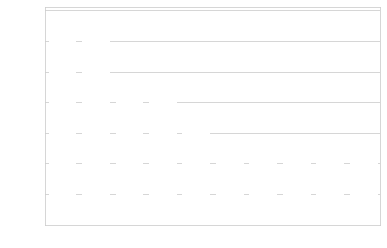

In [1314]:
sns.barplot(x=helper.index, y="topic_0", data=helper, color='white');
plt.ylabel('Word relevance by topic', size=12, family='monospace', color='white')
sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig('wordsTopic0.png', transparent=True, dpi=300)

# Topic 1 - eBay

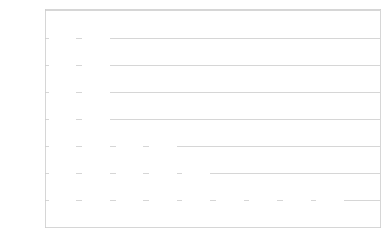

In [1315]:
helper = word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10)
sns.barplot(x=helper.index, y="topic_1", data=helper, color='white');
plt.ylabel('Word relevance by topic', size=12, family='monospace', color='white')
sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig('wordsTopic1.png', transparent=True, dpi=300)

# Topic 2 - Films and short stories

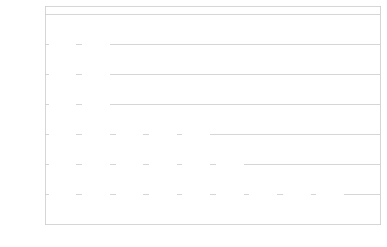

In [1317]:
helper = word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(10)
sns.barplot(x=helper.index, y="topic_2", data=helper, color='white');
plt.ylabel('Word relevance by topic', size=12, family='monospace', color='white')
sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig('wordsTopic2.png', transparent=True, dpi=300)

# Topic 3- Holidays and BlackFriday

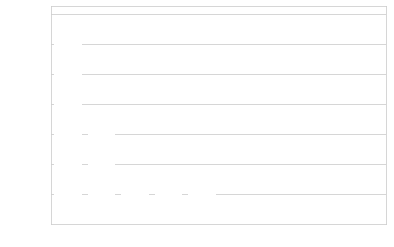

In [1319]:
helper = word_topic_matrix_df.sort_values(by='topic_3', ascending=False).head(10)
sns.barplot(x=helper.index, y="topic_3", data=helper, color='white');
plt.ylabel('Word relevance by topic', size=12, family='monospace', color='white')
sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig('wordsTopic3.png', transparent=True, dpi=300)

In [1322]:
#word_topic_matrix_df

In [ ]:
df.content.iloc[3416]

In [1255]:
df.content.iloc[128]

'@patagonia @tedcruz @WornWear I love that @esquire picked up on the shade!😆 esquire.com/uk/style/a3556…'

In [884]:
#Distribution of the tweets based on their word count after cleaning. 

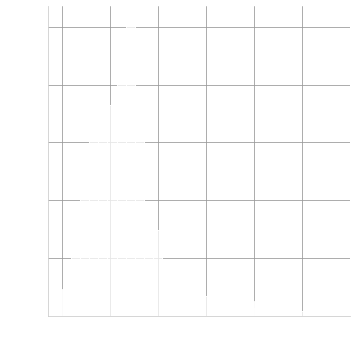

In [1062]:
fig = sns.displot(data=df, x=df.wc, bins=30,  color='white')

#fig = fig.set(xlabel='Number of words', ylabel='Number of tweets')
plt.xlabel('Number of Words', size=12, family='monospace', color='white')
plt.ylabel('Number of Tweets', size=12, family='monospace', color='white')
sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

fig.savefig('wc.png', transparent=True, dpi=300)

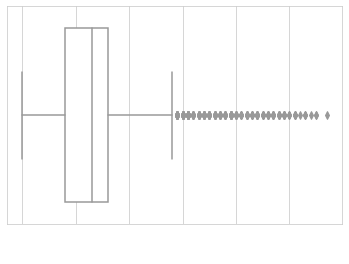

In [1068]:
fig = sns.boxplot(x=df["wc"], color='white')
plt.xlabel('Number of Words', size=12, family='monospace', color='white')
'''plt.ylabel('Number of Tweets', size=12, family='monospace', color='white')'''
sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig('wcBox.png', transparent=True, dpi=300)

In [1192]:
df['wc'].describe()

count   3417.00000
mean      13.70676
std        8.62523
min        0.00000
25%        8.00000
50%       13.00000
75%       16.00000
max       57.00000
Name: wc, dtype: float64

In [1196]:
df['wcbc'].describe()

count   3417.00000
mean      17.83641
std        8.67190
min        3.00000
25%       13.00000
50%       17.00000
75%       20.00000
max       61.00000
Name: wcbc, dtype: float64

# Trying to figure out the topic assigment for each document. 

In [1335]:
tweet_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,tweet_original,clean_tweets
0,0.00000,0.00000,0.00000,0.08526,@Melissa4HD20 Why I do most of our shopping wi...,why i do most of our shopping with and
1,0.07974,0.00660,0.00000,0.00035,@patagonia \nHad this fleece for at least 25 y...,had this fleece for at least yrs. didn’t need...
2,0.02200,0.00570,0.00015,0.00304,this has been my studio sweater for 13 years. ...,this has been my studio sweater for years. ho...
3,0.00000,0.00000,0.00000,0.00000,@LoriMDennis @patagonia @WornWear A bargain,a bargain
4,0.03480,0.00032,0.00185,0.00429,Finally got to test out my new (to me) raincoa...,finally got to test out my new (to me) raincoa...
...,...,...,...,...,...,...
3412,0.00749,0.01103,0.00000,0.00206,@patagonia do you guys have those #WornWear pa...,do you guys have those patches or just that on...
3413,0.00669,0.00161,0.00099,0.00567,RT @nature_org:Great #greenholidays recommenda...,rt recommendation:celebrate what you already o...
3414,0.00669,0.00161,0.00099,0.00567,NaN,NaN
3415,0.00677,0.01263,0.00000,0.02847,Rocking my oldest piece of cold weather gear t...,rocking my oldest piece of cold weather gear t...


In [1481]:
df.reset_index(inplace=True, drop=True)
df.drop(columns='index', inplace=True)
df['assigned_topic'] = tweet_topic_matrix_df.iloc[:,:4].idxmax(axis=1)

In [1343]:
df.shape

(3417, 21)

In [1365]:
df.tail()

,index,date,content,id,user,replyCount,retweetCount,likeCount,quoteCount,media,...,mentionedUsers,coordinates,place,hashtags,clean,lemma,joined_lemma,wc,wcbc,assigned_topic
3412,3864,2013-01-03 10:19:40+00:00,Iterate iterate iterate. The Grandfather: From...,286778849407164416,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,iterate iterate iterate. the grandfather: from...,"[iterate, iterate, iterate, grandfather, toile...",iterate iterate iterate grandfather toilet sea...,20,20,topic_1
3413,3865,2013-01-03 05:06:53+00:00,"wornwear: The Grandfather Yvon Chouinard, Vent...",286700137168912384,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,0,NaN,...,NaN,NaN,NaN,NaN,"wornwear: the grandfather yvon chouinard, vent...","[wornwear, grandfather, yvon, chouinard, ventu...",wornwear grandfather yvon chouinard ventura ca...,16,17,topic_0
3414,3868,2013-01-03 00:56:13+00:00,"wornwear: The Grandfather Yvon Chouinard, Vent...",286637052836069376,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,"wornwear: the grandfather yvon chouinard, vent...","[wornwear, grandfather, yvon, chouinard, ventu...",wornwear grandfather yvon chouinard ventura ca...,16,17,topic_0
3415,3870,2013-01-03 00:02:50+00:00,No surprise that @patagonia nails this @tumblr...,286623619302428672,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,NaN,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['WornWear'],no surprise that nails this campaign . see the...,"[surprise, nail, campaign, granddaddy, fleece]",surprise nail campaign granddaddy fleece,12,15,topic_3
3416,3871,2013-01-02 20:41:33+00:00,Inspiring stories about people who love their ...,286572964739182592,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,1,0,NaN,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['WornWear'],inspiring stories about people who love their ...,"[inspire, stories, people, love, gear]",inspire stories people love gear,8,11,topic_3


# Ok, it worked, we have the topics associated to each document. 

In [1349]:
# Let's begin by doing some exploration in the wc. 

In [1360]:
w #Lists that holds the topics generated by NMF

['topic_0', 'topic_1', 'topic_2', 'topic_3']

In [1385]:
mean_likes = []
mean_rt = []
mean_wc = []
for topic in w:
    mean_likes.append(df[df.assigned_topic==topic].likeCount.mean())
    mean_rt.append(df[df.assigned_topic==topic].retweetCount.mean())
    mean_wc.append(df[df.assigned_topic==topic].wcbc.mean())

In [1382]:
mean_likes

[2.3807157057654074,
 0.3482142857142857,
 0.34980988593155893,
 1.6104218362282878]

In [1383]:
mean_rt

[0.4860834990059642,
 0.14583333333333334,
 0.2661596958174905,
 0.2704714640198511]

In [1386]:
mean_wc

[18.676441351888666,
 17.163690476190474,
 15.524714828897338,
 16.774193548387096]

In [1535]:
#Replacing the name of the topics

In [1558]:
di = {'topic_0': "RepairTours", 'topic_1': "eBayListings", 'topic_2': 'ShortFilms', 'topic_3':'HolidaysBF'}
df = df.replace({'assigned_topic': di})

In [1559]:
df.assigned_topic.value_counts().index[3]

'Films'

In [1560]:
texts = ['RepairTours', 'HolidaysBF', 'eBayListings', 'ShortFilms']

# Percentage of tweets in each one of the four topics:

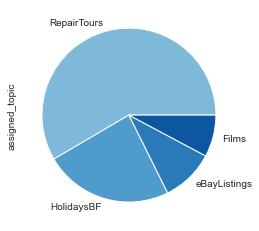

In [1562]:
cmap = plt.get_cmap('Blues')
colors = list(cmap(np.linspace(0.45, 0.85, 4)))
fig = df.assigned_topic.value_counts().plot.pie(colors=colors).get_figure()

#fig.savefig('topic_distribution.png', transparent=True, dpi=300)

# Now, trying to assign the topics based on the results from CorEx

In [1418]:
print(topic_model.p_y_given_x.shape)

(3417, 10)


In [1420]:
pd.DataFrame(topic_model.p_y_given_x).tail(10)

,0,1,2,3,4,5,6,7,8,9
3407,0.00066,0.00115,0.00209,0.00735,0.00027,0.00139,0.35603,0.27824,0.10429,0.37210
3408,0.00057,1.00000,0.02919,0.00735,0.00003,0.01240,0.35607,0.27824,0.01183,0.37205
3409,0.00057,0.00115,0.02199,0.00735,0.00027,0.00910,0.35597,0.27824,0.79452,0.37200
3410,0.00057,1.00000,0.00044,0.00735,0.00003,0.00910,0.35489,0.27824,0.04921,0.37205
3411,0.00057,0.00115,0.02629,0.00735,0.00027,0.00130,0.35598,0.27824,0.41685,0.37200
3412,0.00021,0.00030,0.00837,0.00735,0.00041,0.00910,0.35576,0.27824,0.46861,0.37180
3413,0.00057,0.00115,0.00410,0.00735,0.00003,0.00910,0.35598,0.27824,0.71436,0.37195
3414,0.00057,0.00115,0.00410,0.00735,0.00003,0.00910,0.35598,0.27824,0.71436,0.37195
3415,0.00057,0.00115,0.00003,0.00735,0.00075,0.01439,0.35610,0.27824,0.01183,0.37214
3416,0.00057,1.00000,0.03559,0.00735,0.00027,1.00000,0.35611,0.27824,0.01183,0.37216


In [1497]:
#Assigning each of the documents (tweets), to the topic that holds the highest probability. 

In [1484]:
df['assigned_CorEx'] = pd.DataFrame(topic_model.p_y_given_x).iloc[:,:10].idxmax(axis=1)

In [1475]:
df.head()

,index,url,date,content,id,user,replyCount,retweetCount,likeCount,quoteCount,...,coordinates,place,hashtags,clean,lemma,joined_lemma,wc,wcbc,assigned_topic,assigned_CorEx
0,0,https://twitter.com/lynn32187/status/141103715...,2021-07-02 19:00:47+00:00,@Melissa4HD20 Why I do most of our shopping wi...,1411037150288650243,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,...,NaN,NaN,NaN,why i do most of our shopping with and,[shop],shop,9,13,topic_3,9
1,1,https://twitter.com/Stellabellorum/status/1409...,2021-06-28 21:34:56+00:00,@patagonia \nHad this fleece for at least 25 y...,1409626392342368257,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,0,...,NaN,NaN,['wornwear'],had this fleece for at least yrs. didn’t need...,"[fleece, yrs, need, huge, repair, thank, get, ...",fleece yrs need huge repair thank get fix retu...,35,39,topic_0,2
2,2,https://twitter.com/vmgworks/status/1408136015...,2021-06-24 18:52:42+00:00,this has been my studio sweater for 13 years. ...,1408136015626137608,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,4,1,...,NaN,NaN,"['wornwear', 'patagonia', 'velocitymadegood']",this has been my studio sweater for years. ho...,"[studio, sweater, years, honestly, sure, write...",studio sweater years honestly sure write artis...,40,46,topic_0,9
3,3,https://twitter.com/MikeLantigua/status/140748...,2021-06-22 23:45:37+00:00,@LoriMDennis @patagonia @WornWear A bargain,1407484953714176001,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,...,NaN,NaN,NaN,a bargain,[bargain],bargain,2,5,topic_0,9
4,4,https://twitter.com/LoriMDennis/status/1407483...,2021-06-22 23:41:05+00:00,Finally got to test out my new (to me) raincoa...,1407483811340984327,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,7,0,...,NaN,NaN,NaN,finally got to test out my new (to me) raincoa...,"[finally, get, test, new, raincoat, result, st...",finally get test new raincoat result stellar t...,29,33,topic_0,9


In [1428]:
# Now, doing some analysis from the CorEx topics:
# 0 is about sustainability
# 1 is about film and people's stories
# 2 is about the repair tour
# 3 is related to saving money by fixing or buying used
# 4 is a about eBay and listings 
# 5 is related to celebrate, love, black friday



In [1491]:
mean_likesC = []
mean_rtC = []
mean_wcC = []
for topic in range(6):
    mean_likesC.append(df[df.assigned_CorEx==topic].likeCount.mean())
    mean_rtC.append(df[df.assigned_CorEx==topic].retweetCount.mean())
    mean_wcC.append(df[df.assigned_CorEx==topic].wcbc.mean())

In [1492]:
mean_likesC

[14.473684210526315,
 0.4063745019920319,
 1.811377245508982,
 3.0344827586206895,
 0.08571428571428572,
 1.6535433070866141]

In [1493]:
mean_rtC

[1.8771929824561404,
 0.28286852589641437,
 0.5508982035928144,
 0.41379310344827586,
 0.011428571428571429,
 0.3228346456692913]

In [1494]:
mean_wcC

[25.263157894736842,
 16.99203187250996,
 19.74700598802395,
 26.586206896551722,
 19.13142857142857,
 18.291338582677167]

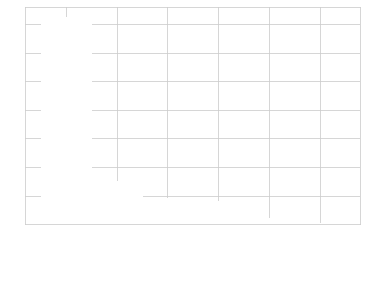

In [1605]:
import numpy as np                                                               
import matplotlib.pyplot as plt  

top=[('Sustainability',14.47),('Save money',3.03),('Repair tour',1.81), ('Celebrate',1.65), ('Films', 0.406),
    ('eBay', 0.08)]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

fig = plt.figure()  
plt.xticks(rotation='vertical')

ax = fig.gca()  #get current axes
ax.bar(xs, ys, width, align='center', color='white')

#Remove the default x-axis tick numbers and  
#use tick numbers of your own choosing:
ax.set_xticks(xs)
#Replace the tick numbers with strings:
ax.set_xticklabels(labels)
#Remove the default y-axis tick numbers and  
#use tick numbers of your own choosing:
#ax.set_yticks(ys)

sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig('meanLikes.png', transparent=True, dpi=300)

In [ ]:
X = ['Mean_likes','Mean_rts','Mean_wordCounts']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = '')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [1496]:
#Practicing getting the indexes before applying a function and getting all of the tweets. 

In [1470]:
df[df.assigned_CorEx==3].likeCount.sort_values(ascending=False).index[:5]

Int64Index([393, 712, 725, 239, 1158], dtype='int64')

In [1495]:
for topic in range(6):
    idx = df[df.assigned_CorEx==topic].likeCount.sort_values(ascending=False).index[:3]
    for i in idx:
        print(df.iloc[i])

url               https://twitter.com/Katerioniz/status/13055691...
date                                      2020-09-14 18:08:46+00:00
content           @funkybunch50 Patagonia also has a website cal...
id                                              1305569191542566913
user              {'_type': 'snscrape.modules.twitter.User', 'us...
replyCount                                                        2
retweetCount                                                     64
likeCount                                                       669
quoteCount                                                        3
media                                                           NaN
retweetedTweet                                                  NaN
quotedTweet                                                     NaN
mentionedUsers    [{'_type': 'snscrape.modules.twitter.User', 'u...
coordinates                                                     NaN
place                                           

In [1571]:
df[df.assigned_CorEx==2].content.sample(10)

928     @patagonia wornwear tour @MancClimbCentre toda...
1053    The @patagonia #WornWear tour is on the road a...
2112    Seattleites Welcome the #Patagonia Worn Wagon ...
3164    Repair Your Old Clothes, Don't Buy New Ones ma...
1914    The Beast: Santa Cruz Gear Repair​'s answer to...
1386    #Humpday #Inspiration goes to @patagonia  #wor...
938     The @wornwear truck is at our Ambleside campus...
751     We had the incredible opportunity to host @pat...
2871    Was inspired to fix up my old gear instead of ...
893     Thanks @patagonia #wornwear @SnowAndRock #Cove...
Name: content, dtype: object

In [1573]:
df.iloc[928]

url               https://twitter.com/john_dunne/status/86697533...
date                                            2017-05-23 11:13:23
content           @patagonia wornwear tour @MancClimbCentre toda...
id                                               866975339175698432
user              {'_type': 'snscrape.modules.twitter.User', 'us...
replyCount                                                        0
retweetCount                                                      1
likeCount                                                         4
quoteCount                                                        0
media             [{'_type': 'snscrape.modules.twitter.Photo', '...
retweetedTweet                                                  NaN
quotedTweet                                                     NaN
mentionedUsers    [{'_type': 'snscrape.modules.twitter.User', 'u...
coordinates                                                     NaN
place                                           

In [1575]:
df.iloc[1374]

url               https://twitter.com/KooleHelene/status/7365388...
date                                            2016-05-28 12:45:10
content           Got my bag fixed by @patagonia #wornwear tour ...
id                                               736538808682991616
user              {'_type': 'snscrape.modules.twitter.User', 'us...
replyCount                                                        0
retweetCount                                                      0
likeCount                                                         2
quoteCount                                                        0
media             [{'_type': 'snscrape.modules.twitter.Photo', '...
retweetedTweet                                                  NaN
quotedTweet                                                     NaN
mentionedUsers    [{'_type': 'snscrape.modules.twitter.User', 'u...
coordinates                                                     NaN
place                                           

In [1576]:
df[df.assigned_CorEx==4].content.sample(10)

2132    I just listed 'Patagonia polo shirt, Mens M, o...
1945    I just listed 'Lost Season 1 DVD set, complete...
2128    I just listed 'Prana polo shirt mens M' on eBa...
2028    I just listed 'Patagonia lightweight softshell...
2351    I just listed 'Land Rover Driving School exped...
2018    I just listed 'Ralph Lauren classic fit oxford...
1921    I just listed 'Exofficio travel/safari pants, ...
2094    I just listed 'Merrell encore ice moc, womens ...
1644    I just listed 'Patagonia capilene womens fleec...
2012    I just listed 'Patagonia polo shirt. Mens XL '...
Name: content, dtype: object

In [1577]:
df.iloc[2132]

url               https://twitter.com/ThriftyCloset22/status/595...
date                                            2015-05-04 01:10:14
content           I just listed 'Patagonia polo shirt, Mens M, o...
id                                               595032651783737345
user              {'_type': 'snscrape.modules.twitter.User', 'us...
replyCount                                                        0
retweetCount                                                      0
likeCount                                                         0
quoteCount                                                        0
media                                                           NaN
retweetedTweet                                                  NaN
quotedTweet                                                     NaN
mentionedUsers                                                  NaN
coordinates                                                     NaN
place                                           

In [1585]:
df[df.assigned_CorEx==1].content.sample(10)

3226    “The stories you wear..." RT @patagonia 'celeb...
3317    .@patagonia releases new film #WornWear as alt...
2143    When you buy quality you only cry once.\n\nChe...
3033    Psyched!  Check out the film today wornwear.pa...
3276    RT @patagonia: "The longer I keep a piece of g...
3064    "The longer I keep a piece of gear, the more s...
681     Celebrating the Stories We Wear with @patagoni...
3396    Real people. Real stories. Awesome. #WornWear ...
2909    If you haven't watched yet, you should! youtu....
2001    The @patagonia #wornwear initiative calls for ...
Name: content, dtype: object

In [1587]:
df.iloc[3396]

url               https://twitter.com/channingjones_/status/3203...
date                                            2013-04-06 00:43:09
content           Real people. Real stories. Awesome. #WornWear ...
id                                               320335838011588608
user              {'_type': 'snscrape.modules.twitter.User', 'us...
replyCount                                                        0
retweetCount                                                      0
likeCount                                                         0
quoteCount                                                        0
media                                                           NaN
retweetedTweet                                                  NaN
quotedTweet                                                     NaN
mentionedUsers    [{'_type': 'snscrape.modules.twitter.User', 'u...
coordinates                                                     NaN
place                                           

In [1595]:
df[df.assigned_CorEx==5].content.sample(10)

2642    Loving the new #wornwear excerpt from @patagon...
3254    The antidote to #BlackFriday! @patagonia's #wo...
688     looking forward to joining  wornwear  patagoni...
1379    We love @patagonia  a great example of being s...
1052    Celebrate #RepaiRIT week today with us, #WornW...
199     @zombeeapokalips @mtnealbmf @patagonia @tedcru...
606     Another reason I love @patagonia-\nIn Nov. a r...
13      I decided to only buy used pants and shirts. I...
2099    #Repost @patagonia love that truck\n・・・\nOh th...
2141    Also love this interview with the founder of @...
Name: content, dtype: object

In [1596]:
df.iloc[1052]

url               https://twitter.com/RIT_SEAL/status/8463374301...
date                                            2017-03-27 12:25:42
content           Celebrate #RepaiRIT week today with us, #WornW...
id                                               846337430173237249
user              {'_type': 'snscrape.modules.twitter.User', 'us...
replyCount                                                        0
retweetCount                                                      0
likeCount                                                         0
quoteCount                                                        0
media             [{'_type': 'snscrape.modules.twitter.Photo', '...
retweetedTweet                                                  NaN
quotedTweet                                                     NaN
mentionedUsers    [{'_type': 'snscrape.modules.twitter.User', 'u...
coordinates                                                     NaN
place                                           

# Distribution of tweets by years

In [1501]:
df["date"] = df["date"].astype("datetime64")

In [1504]:
df.date.min()

Timestamp('2013-01-02 20:41:33')

In [1505]:
df.date.max()

Timestamp('2021-07-02 19:00:47')

In [1509]:
df.columns

Index(['url', 'date', 'content', 'id', 'user', 'replyCount', 'retweetCount',
       'likeCount', 'quoteCount', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'coordinates', 'place', 'hashtags', 'clean', 'lemma',
       'joined_lemma', 'wc', 'wcbc', 'assigned_topic', 'assigned_CorEx'],
      dtype='object')

In [1512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   url             3417 non-null   object        
 1   date            3417 non-null   datetime64[ns]
 2   content         3417 non-null   object        
 3   id              3417 non-null   int64         
 4   user            3417 non-null   object        
 5   replyCount      3417 non-null   int64         
 6   retweetCount    3417 non-null   int64         
 7   likeCount       3417 non-null   int64         
 8   quoteCount      3417 non-null   int64         
 9   media           855 non-null    object        
 10  retweetedTweet  0 non-null      float64       
 11  quotedTweet     119 non-null    object        
 12  mentionedUsers  2419 non-null   object        
 13  coordinates     238 non-null    object        
 14  place           238 non-null    object        
 15  hash

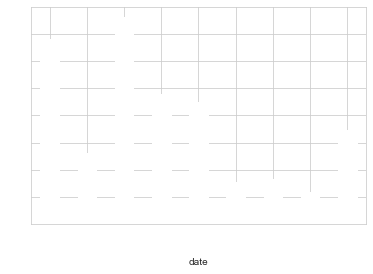

In [1522]:
fig = df.groupby(df["date"].dt.year)['content'].count().plot(kind="bar", color = 'white').get_figure()
sns.axes_style({'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'axes.facecolor': 'white',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'white',
 'patch.edgecolor': 'white'})
sns.set_style("whitegrid", {"grid.color": ".8"})
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
fig.savefig('tweets_year.png', transparent=True, dpi=300)

In [1515]:
df[df.date.dt.year ==2020].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 346 to 464
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   url             119 non-null    object        
 1   date            119 non-null    datetime64[ns]
 2   content         119 non-null    object        
 3   id              119 non-null    int64         
 4   user            119 non-null    object        
 5   replyCount      119 non-null    int64         
 6   retweetCount    119 non-null    int64         
 7   likeCount       119 non-null    int64         
 8   quoteCount      119 non-null    int64         
 9   media           43 non-null     object        
 10  retweetedTweet  0 non-null      float64       
 11  quotedTweet     5 non-null      object        
 12  mentionedUsers  96 non-null     object        
 13  coordinates     9 non-null      object        
 14  place           9 non-null      object        
 15  hash

In [1516]:
df[df.date.dt.year ==2015].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 1713 to 2473
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   url             761 non-null    object        
 1   date            761 non-null    datetime64[ns]
 2   content         761 non-null    object        
 3   id              761 non-null    int64         
 4   user            761 non-null    object        
 5   replyCount      761 non-null    int64         
 6   retweetCount    761 non-null    int64         
 7   likeCount       761 non-null    int64         
 8   quoteCount      761 non-null    int64         
 9   media           161 non-null    object        
 10  retweetedTweet  0 non-null      float64       
 11  quotedTweet     25 non-null     object        
 12  mentionedUsers  456 non-null    object        
 13  coordinates     48 non-null     object        
 14  place           48 non-null     object        
 15  ha

In [1384]:
df.sort_values(by=['likeCount'], ascending=False).head(5)

,index,date,content,id,user,replyCount,retweetCount,likeCount,quoteCount,media,...,mentionedUsers,coordinates,place,hashtags,clean,lemma,joined_lemma,wc,wcbc,assigned_topic
393,404,2020-09-14 18:08:46+00:00,@funkybunch50 Patagonia also has a website cal...,1305569191542566913,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,64,669,3,NaN,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,patagonia also has a website called wornwear w...,"[patagonia, website, call, wornwear, sell, pie...",patagonia website call wornwear sell piece hel...,28,29,topic_0
330,336,2021-02-18 21:16:17+00:00,"@patagonia @tedcruz @WornWear Thanks, Ted Cruz...",1362511279399690240,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,5,173,0,NaN,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,"thanks, ted cruz for travelling to mexico and ...","[thank, ted, cruz, travel, mexico, set, example]",thank ted cruz travel mexico set example,14,17,topic_0
326,332,2021-02-18 21:18:15+00:00,@patagonia @tedcruz @WornWear This is the kind...,1362511771416858640,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,147,0,NaN,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,this is the kind of shade i come to twitter for.,"[kind, shade, come, twitter]",kind shade come twitter,11,14,topic_3
310,316,2021-02-18 21:35:06+00:00,@patagonia @tedcruz @WornWear @patagonia can y...,1362516013028409346,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,132,1,NaN,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,can you guarantee i won’t be getting anything ...,"[guarantee, win, get, touch, purchase, gear, s...",guarantee win get touch purchase gear site lov...,27,32,topic_3
250,256,2021-02-19 01:42:09+00:00,@MannyMoreno16 @patagonia @tedcruz @WornWear '...,1362578186257588224,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,130,0,NaN,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,'don't make this political.' did you just lear...,"[political, learn, patagonia, today]",political learn patagonia today,11,15,topic_0


In [716]:
#09-11-2021. Studying at Nick's place, having my 2nd coffee cup and feeling a lot better after hanging out and taking a nice walk in the beautiful day. 

# Checking the functionality of TextBlob correct

In [891]:
#Trying TextBlob for correcting. 
from textblob import TextBlob

In [912]:
df.clean[4]

'finally got to test out my new (to me) raincoat results are stellar! thank you for letting me swap some gently used items for this excellent garment. win-win! ❤️ '

In [909]:
textBlb = TextBlob(df.clean[4])

In [910]:
textCorrected = textBlb.correct()   # Correcting the text

In [911]:
textCorrected

TextBlob("finally got to test out my new (to me) raincoat results are cellar! thank you for letting me swap some gently used items for this excellent garment. win-win! ❤️ ")

In [1323]:
#Hmmm... After trying with some documents, it seemed not to be a good fix for my application